In [474]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [475]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [476]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [477]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Handling Missing Data 

In [478]:
percentage = pd.Series((df_train.isna().sum() / len(df_train)) * 100)
print(percentage)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


Vip column seems to have the highest percetage of missing columns . Other columns also have atleast 2-3% missing values this needs to be dealt carefully later.

In [479]:
#By numbers the missing value are 
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We can Directly remove Passenger_Id and Name  column because they seem to have all unique values 

In [480]:
df_train.drop(columns=['Name','PassengerId','Cabin'],inplace=True)
df_test.drop(columns=['Name','PassengerId','Cabin'],inplace=True)
print(df_train.columns)

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')


In [481]:
print(df_train.head())

  HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  
0           0.0     0.0     0.0        False  
1          25.0   549.0    44.0         True  
2           0.0  6715.0    49.0        False  
3         371.0  3329.0   193.0        False  
4         151.0   565.0     2.0         True  


In [482]:
print("The number of duplicated rows {}".format(df_train.duplicated().sum()))

The number of duplicated rows 2266


In [483]:
df_train.drop_duplicates(inplace=True)

we can fill the categorial columns with the mode values and the columns with non-categorial data with median or mean 

In [484]:
category = ['HomePlanet','CryoSleep','Destination','VIP']

for i in category:
    df_train[i] = df_train[i].fillna(value = df_train[i].mode().iloc[0])

print(df_train.isna().sum())

HomePlanet        0
CryoSleep         0
Destination       0
Age             120
VIP               0
RoomService     178
FoodCourt       175
ShoppingMall    199
Spa             182
VRDeck          182
Transported       0
dtype: int64


In [485]:
for i in df_train.columns :
    if df_train[i].dtype != object:
        df_train[i] = df_train[i].fillna(value = df_train[i].median())
    else:
        continue

print(df_train.isna().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


# Visualising data 


In [486]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6427 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6427 non-null   object 
 1   CryoSleep     6427 non-null   bool   
 2   Destination   6427 non-null   object 
 3   Age           6427 non-null   float64
 4   VIP           6427 non-null   bool   
 5   RoomService   6427 non-null   float64
 6   FoodCourt     6427 non-null   float64
 7   ShoppingMall  6427 non-null   float64
 8   Spa           6427 non-null   float64
 9   VRDeck        6427 non-null   float64
 10  Transported   6427 non-null   bool   
dtypes: bool(3), float64(6), object(2)
memory usage: 470.7+ KB


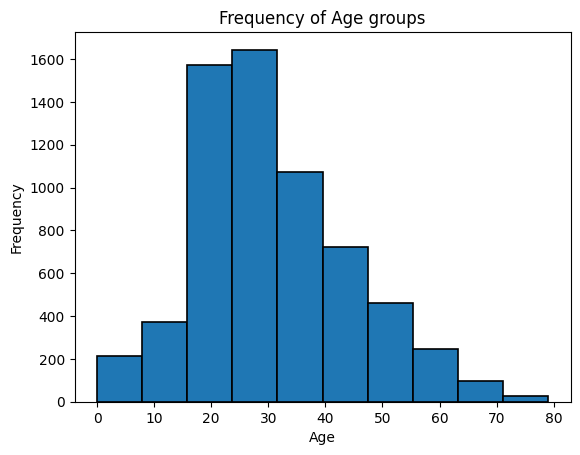

In [487]:
plt.hist(df_train.Age,linewidth = 1.2 , edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency of Age groups")
plt.show()

In [488]:
vips = df_train['VIP'].value_counts().loc[True]
temp_df = df_train[['VIP','Transported']]
vips_survived = temp_df[temp_df['VIP'] == True].iloc[:,1].value_counts().loc[True]
per_vips = (vips_survived / vips ) * 100
normal = vips = df_train['VIP'].value_counts().loc[False]
normal_survived = temp_df[temp_df['VIP'] == False].iloc[:,1].value_counts().loc[True]
per_survived = normal_survived / normal

print("The Transportation rate for VIPS = {} \nThe Transportation rate for Normal passengers = {}".format(per_vips,per_survived))

The Transportation rate for VIPS = 37.56345177664975 
The Transportation rate for Normal passengers = 0.39117174959871587


Opting for VIP class improved chances to get transported by multiple folds

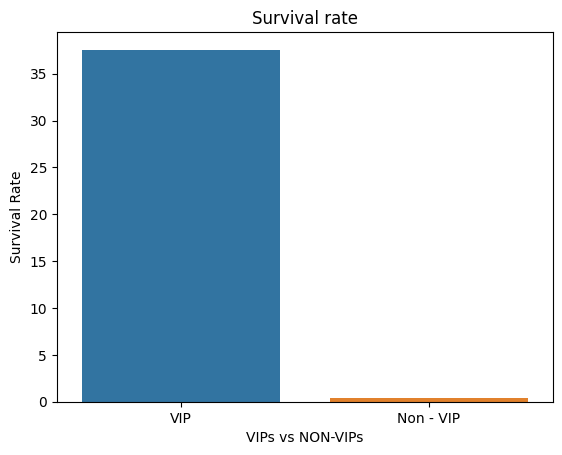

In [489]:
sns.barplot(x = ["VIP","Non - VIP"] , y = [per_vips,per_survived])
plt.xlabel("VIPs vs NON-VIPs")
plt.ylabel("Survival Rate")
plt.title("Survival rate")
plt.show()

Did spending on RoomService	, FoodCourt	, ShoppingMall , Spa ,VRDec increase the chances of transprotation ? 

In [490]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [491]:
room_service = df_train[df_train['RoomService'] > 0][["RoomService","Transported"]]
room_service = len(room_service[room_service['Transported'] == True])
no_room_service = df_train[df_train['RoomService'] == 0][['RoomService',"Transported"]]
no_room_service = len(no_room_service[no_room_service['Transported'] == True])
per_room_service = (room_service / len(df_train[df_train['RoomService'] > 0])) * 100
per_no_room_service = (no_room_service / len(df_train[df_train['RoomService'] == 0])) * 100

print("Percentage of transprotation who spent on room service {} \nPercentage of transprotation who did not spent on room service {}".format(per_room_service,per_no_room_service))


Percentage of transprotation who spent on room service 25.996592844974447 
Percentage of transprotation who did not spent on room service 50.057273768613975


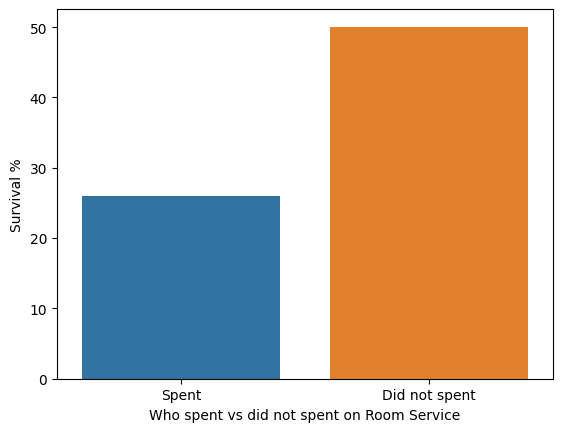

In [492]:
sns.barplot(x = ['Spent','Did not spent'],y = [per_room_service,per_no_room_service])
plt.xlabel("Who spent vs did not spent on Room Service")
plt.ylabel("Survival %")
plt.show()

Taking a look at OutLiers

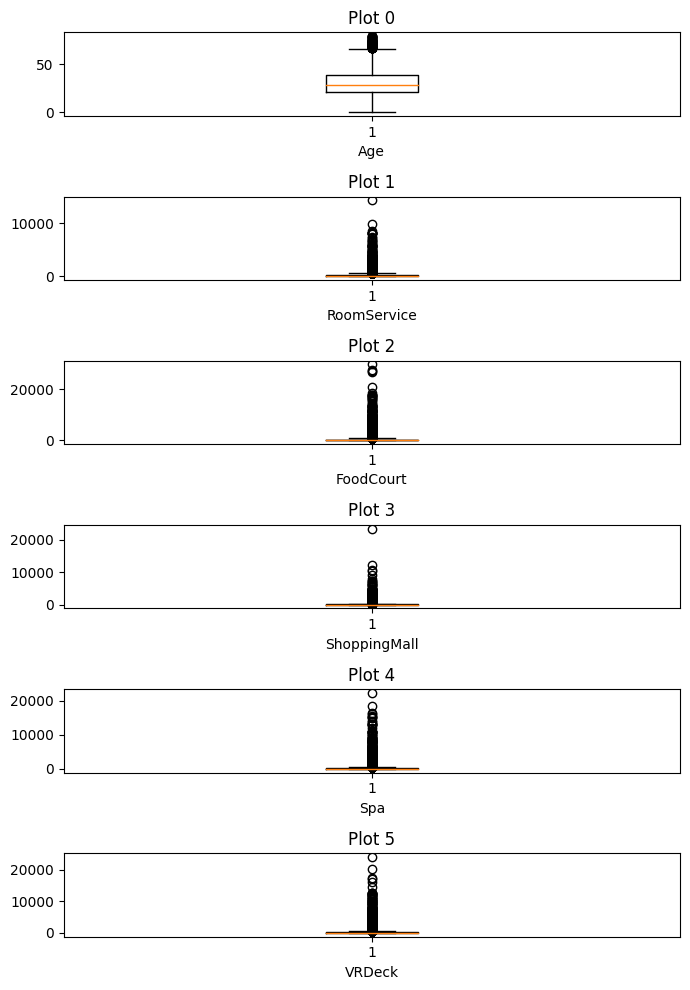

In [493]:
col = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

fig , ax = plt.subplots(nrows=len(col),ncols=1,figsize=(7,10))


for i , col in enumerate(col):
    ax[i].boxplot(df_train[col])
    ax[i].set_title("Plot {}".format(i))
    ax[i].set_xlabel("{}".format(col))

plt.tight_layout()
plt.show()
    



In [494]:
df_train.describe(include = "all")

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,6427,6427,6427,6427.000000,6427,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427
unique,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,False
freq,3693,5373,4571,NaN,6230,NaN,NaN,NaN,NaN,NaN,3916
mean,NaN,NaN,NaN,30.749806,NaN,297.579119,606.540688,229.359266,412.007624,403.421503,NaN
std,NaN,NaN,NaN,13.792963,NaN,753.024549,1829.924494,685.567384,1292.037912,1302.835427,NaN
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,21.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,28.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
75%,NaN,NaN,NaN,39.000000,NaN,226.500000,320.500000,128.000000,217.500000,197.000000,NaN


In [495]:
df_train['FoodCourt'].quantile(0.999)

17933.71800000003

Coorelation matrix

<Axes: >

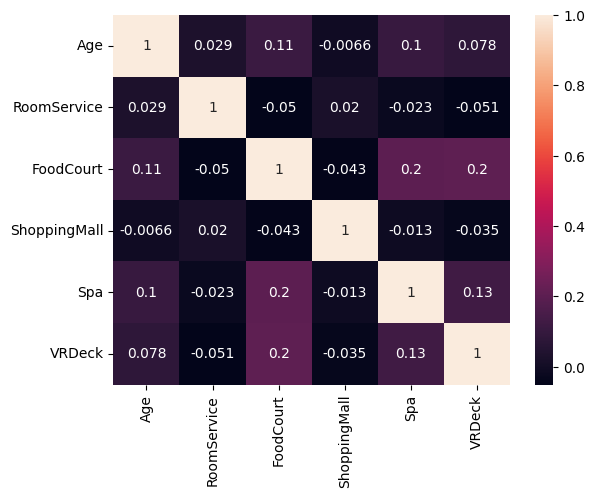

In [496]:
temp_df = df_train.drop(columns = ['HomePlanet','CryoSleep','Destination','Transported','VIP'])
mat = temp_df.corr()
sns.heatmap(mat,annot=True)

### Handling categorial columns 


In [497]:
categorical_col = []

for i in df_train.columns:
     if df_train[i].dtype == 'object':
          categorical_col.append(i)

transporterd = df_train['Transported']
df_train.drop(columns = 'Transported',inplace = True)


In [498]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


clr = ColumnTransformer(transformers= [('t1',OneHotEncoder(),categorical_col)],remainder="passthrough",n_jobs=-1,)
clr.fit(df_train)
df_train = clr.transform(df_train)


In [499]:
df_train = np.concatenate([df_train,np.array(transporterd).reshape(-1,1)],axis = 1)
df_train = df_train.astype(dtype = np.float32)

In [500]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [["LR",LogisticRegression()],["SVC",SVC()],["DT",DecisionTreeClassifier()],["RF",RandomForestClassifier()],['XG',XGBClassifier()]]
names = []
train_scores = []

for name , model in models:

    model.fit(df_train[:,:-1],df_train[:,-1])
    train_scores.append(model.score(df_train[:,:-1],df_train[:,-1]))
    names.append(name)

/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [501]:
print(names)
print(train_scores)

['LR', 'SVC', 'DT', 'RF', 'XG']
[0.7831025361755096, 0.775322856698304, 0.9584565115917224, 0.9584565115917224, 0.8903065193714019]


The Decesion tree and Random Forest Classifier seem to be giving us the best performance , so we should further improve them by hyperparameter tuning 

In [557]:
from sklearn.model_selection import GridSearchCV

param = {
    "n_estimators" : [100,150],
    "min_samples_leaf" : [1,2,5,6,8],
    "min_samples_split" : [1,2,3,4,5,6]
}

grid = GridSearchCV(RandomForestClassifier(),param_grid=param,n_jobs=-1,cv=3)
grid.fit(df_train[:,:-1],df_train[:,-1])

/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    valida

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 5, 6, 8],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 150]})

In [558]:
print("The best score is {}".format(grid.best_score_))
print("The best parameters are {}".format(grid.best_params_))

The best score is 0.778901377526175
The best parameters are {'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 100}


In [547]:
temp = RandomForestClassifier(min_samples_split = 2).fit(df_train[:,:-1],df_train[:,-1])
temp.score(df_train[:,:-1],df_train[:,-1])


0.9584565115917224